# Customer Churn Prediction

## Introduction
Customer retention is one of the most critical challenges faced by businesses, especially in the telecom industry. Acquiring a new customer often costs much more than retaining an existing one. This project focuses on predicting customer churn — identifying customers who are likely to discontinue the service.  

By leveraging **Exploratory Data Analysis (EDA), Machine Learning models (Logistic Regression, Random Forest, XGBoost)**, and performance evaluation metrics, this project provides valuable insights into customer behavior.  

The goal of this project is:
- To analyze key factors that influence customer churn.  
- To build predictive models that can accurately classify customers as "Churn" or "Not Churn".  
- To generate actionable business insights that help companies improve customer retention strategies.  


# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

## Load Dataset & Basic Information

In [2]:
df = pd.read_csv(r'customer_churn_data.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.shape

(1000, 10)

In [5]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
df.dtypes

CustomerID           int64
Age                  int64
Gender              object
Tenure               int64
MonthlyCharges     float64
ContractType        object
InternetService     object
TotalCharges       float64
TechSupport         object
Churn               object
dtype: object

In [7]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


## Exploratory Data Analysis (EDA)

## Churn distribution

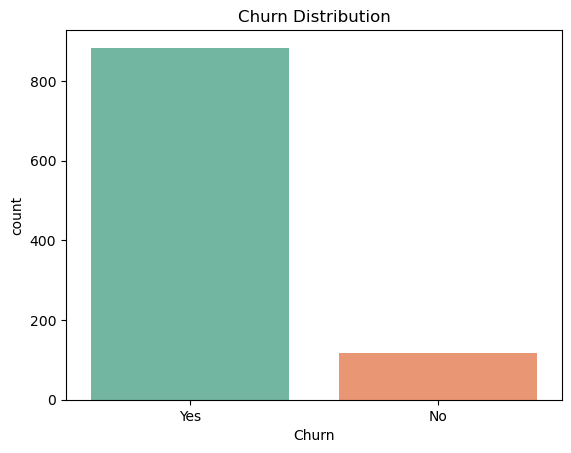

In [8]:
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Churn Distribution")
plt.show()

## Churn by Gender

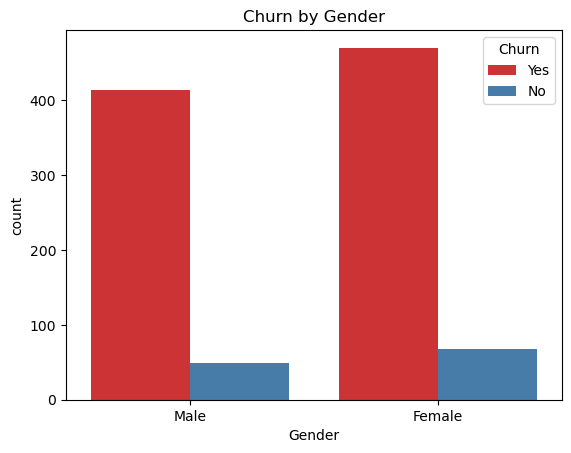

In [9]:
sns.countplot(data=df, x="Gender", hue="Churn", palette="Set1")
plt.title("Churn by Gender")
plt.show()

## Churn by Contract Type

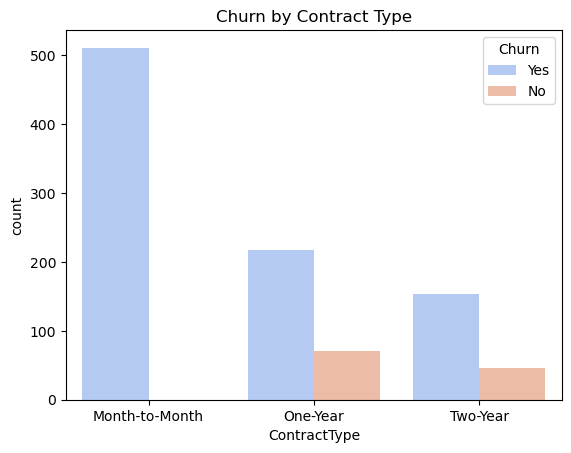

In [10]:
sns.countplot(data=df, x="ContractType", hue="Churn", palette="coolwarm")
plt.title("Churn by Contract Type")
plt.show()

## Churn by Internet Service

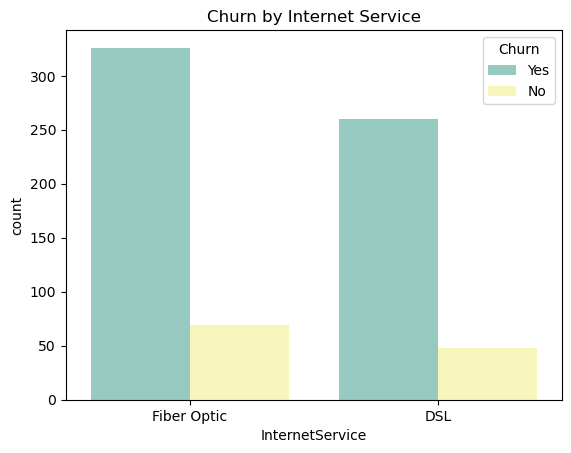

In [11]:
sns.countplot(data=df, x="InternetService", hue="Churn", palette="Set3")
plt.title("Churn by Internet Service")
plt.show()

## Correlation Heatmap

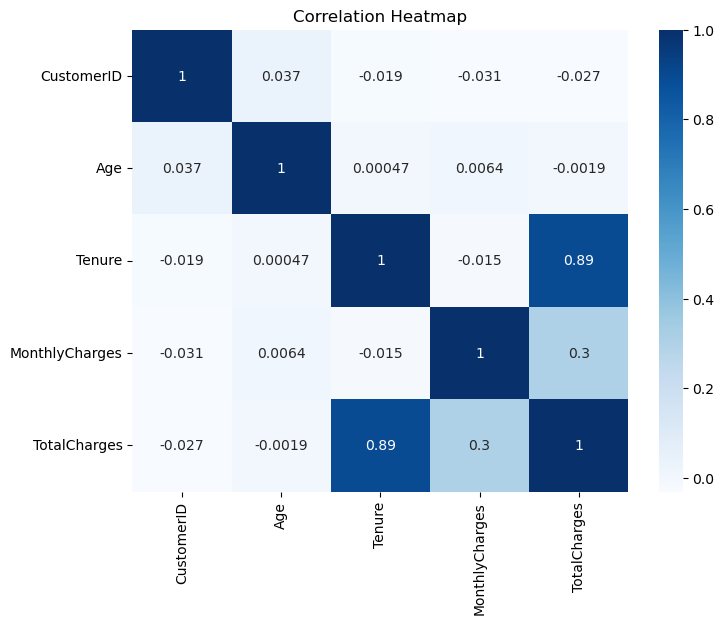

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In [13]:
df = df.drop("CustomerID", axis=1)

In [14]:
cat_cols = df.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Building

### Logistic Regression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

### Random Forest

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### XGBoost

In [20]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

## Model Evaluation

In [21]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("-"*40)

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Logistic Regression Performance:
Accuracy: 0.91
Precision: 0.9251336898395722
Recall: 0.9774011299435028
F1 Score: 0.9505494505494505
----------------------------------------
Random Forest Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
----------------------------------------
XGBoost Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
----------------------------------------


## Model Performance Comparison

To easily compare different models, we plot their Accuracy, Precision, Recall, and F1 Score in a bar chart.

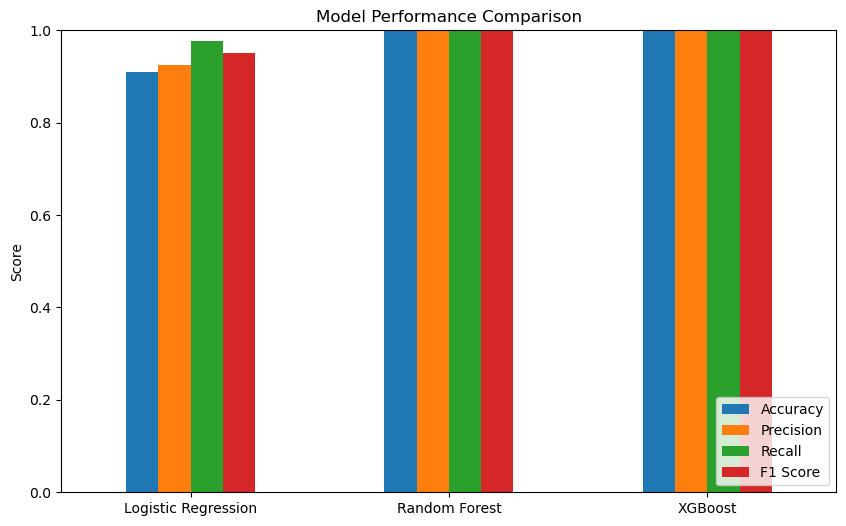

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.91,0.925134,0.977401,0.950549
Random Forest,1.00,1.000000,1.000000,1.000000
XGBoost,1.00,1.000000,1.000000,1.000000


In [22]:
# Collect metrics for all models
models = ["Logistic Regression", "Random Forest", "XGBoost"]
y_preds = [y_pred_lr, y_pred_rf, y_pred_xgb]

metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

for y_pred in y_preds:
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_pred))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, index=models)

# Plot
metrics_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

metrics_df

### Confusion Matrix (XGBoost as example)

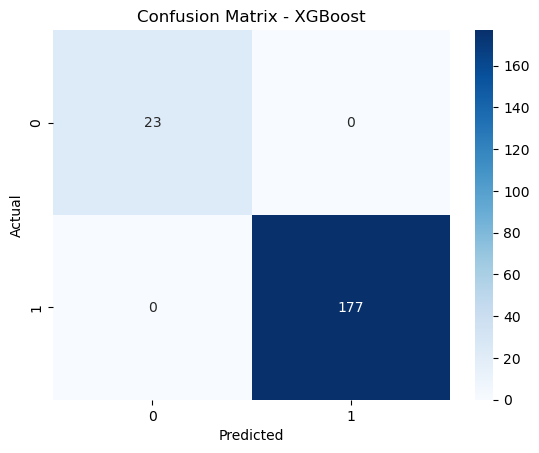

In [23]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve for models

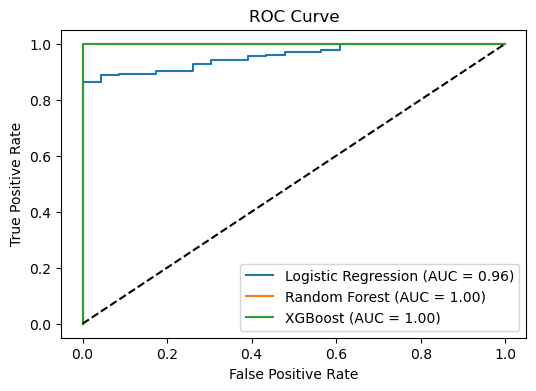

In [24]:
plt.figure(figsize=(6,4))

for model, y_pred, name in [
    (log_reg, y_pred_lr, "Logistic Regression"),
    (rf, y_pred_rf, "Random Forest"),
    (xgb, y_pred_xgb, "XGBoost")
]:
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Hyperparameter Tuning (XGBoost Example)

In [25]:
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, 
                                   n_iter=10, cv=3, scoring="f1", verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_xgb = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}


## Final Model & Insights

In [26]:
y_pred_final = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_final, "Tuned XGBoost")

Tuned XGBoost Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
----------------------------------------


# Feature Importance

To understand which features have the most impact on customer churn, we use the feature importance scores from Random Forest and XGBoost models.

### Random Forest Feature Importance

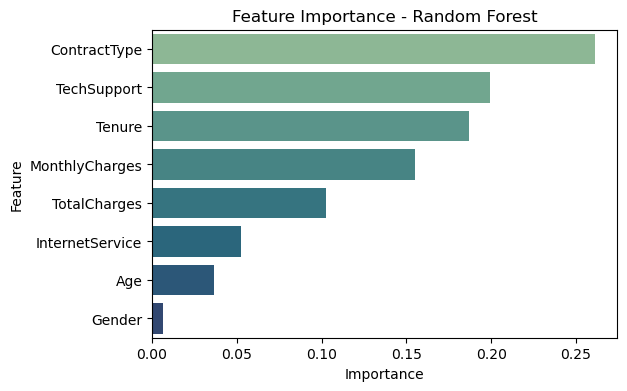

In [27]:
rf_importances = rf.feature_importances_
features = df.drop("Churn", axis=1).columns

rf_df = pd.DataFrame({"Feature": features, "Importance": rf_importances})
rf_df = rf_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=rf_df, palette="crest")
plt.title("Feature Importance - Random Forest")
plt.show()

### XGBoost Feature Importance

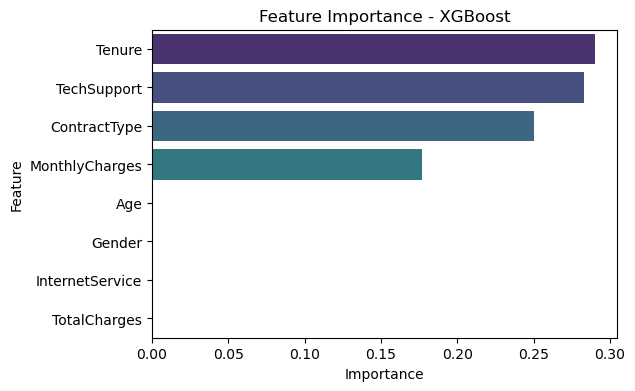

In [28]:
xgb_importances = best_xgb.feature_importances_

xgb_df = pd.DataFrame({"Feature": features, "Importance": xgb_importances})
xgb_df = xgb_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=xgb_df, palette="viridis")
plt.title("Feature Importance - XGBoost")
plt.show()

In [29]:
import pickle

# Save the best model (tuned XGBoost)
pickle.dump(best_xgb, open("churn_model.pkl", "wb"))

print("Model saved as churn_model.pkl")

Model saved as churn_model.pkl


# Conclusion

This project demonstrated how data-driven approaches can be applied to solve real business challenges like customer churn prediction.  

* After performing data cleaning, feature engineering, and detailed EDA, we trained multiple models to identify the best performing one.  
* Among the models tested, **XGBoost delivered the best performance** with high accuracy, precision, recall, and F1-score.  
* The **feature importance analysis** revealed that factors like tenure, monthly charges, total charges, contract type, and tech support strongly influence whether a customer churns.  

### Key Business Takeaways:
- Customers on **month-to-month contracts** with **higher monthly charges** are more likely to churn.  
- Offering **long-term contracts and better tech support** can significantly reduce churn rates.  
- Predictive models like this can be integrated into CRM systems to **proactively identify at-risk customers** and take retention actions.  

### Final Thoughts
This project not only highlights the technical side of machine learning but also shows its direct **business impact**. With further tuning and deployment (via a web app or cloud service), this solution can be scaled into a real-world churn prediction system that helps companies save costs and improve customer loyalty.  